In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68390_U')

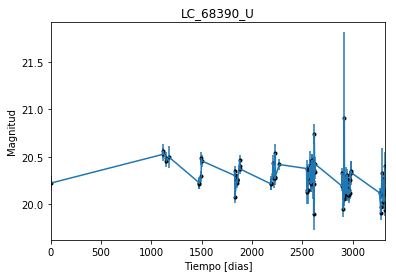

In [2]:
data = np.genfromtxt('LC_68390_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68390_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

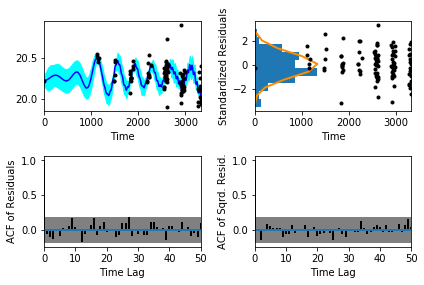

In [5]:
sample.assess_fit()

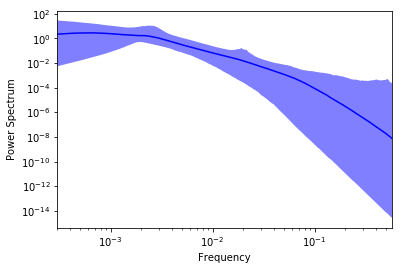

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68390_U')

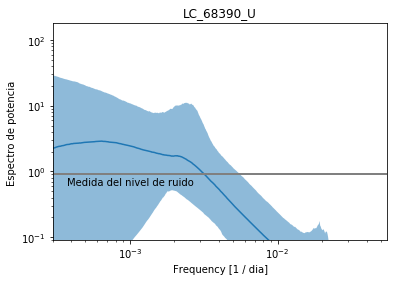

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68390_U')

Text(0.5,1,'Prediccion , valor esperado 68390_U')

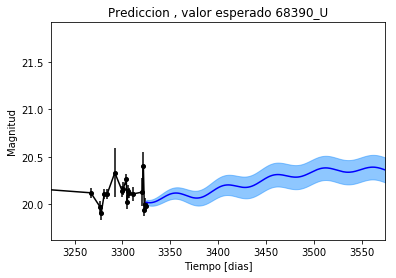

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 68390_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_68390_U')

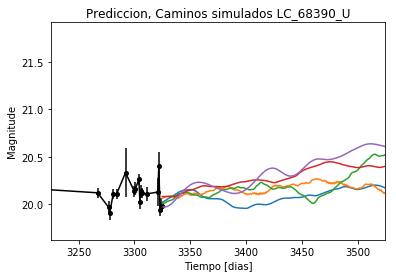

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68390_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68390_U')

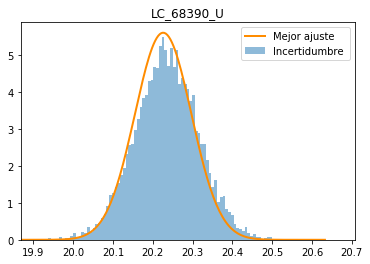

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68390_U')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_U')

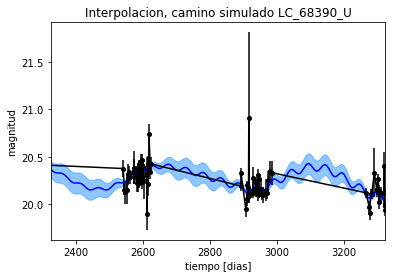

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_U')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_U')

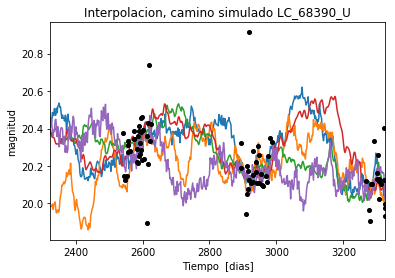

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 637.465628154
Median: 0.0180989524104
Standard deviation: 0.199827891265
68% credibility interval: [ 0.00146739  0.18788952]
95% credibility interval: [  3.71162392e-04   7.59737497e-01]
99% credibility interval: [  3.16236196e-04   1.09031587e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 700.571988756
Median: 0.00717679212206
Standard deviation: 0.115484217024
68% credibility interval: [ 0.0006644  0.0726789]
95% credibility interval: [  3.40833351e-04   4.23063364e-01]
99% credibility interval: [  3.08500956e-04   7.31943220e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 691.944468828
Median: 0.027477249992
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 398.832795329
Median: 153.689463324
Standard deviation: 1.8581197653
68% credibility interval: [ 151.77493959  155.2217104 ]
95% credibility interval: [ 149.32240216  156.66751213]
99% credibility interval: [ 147.53151831  157.59194249]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 524.814593593
Median: 0.885103628653
Standard deviation: 2.4721202252
68% credibility interval: [ 0.12532469  4.46088581]
95% credibility interval: [ 0.01741568  8.64736719]
99% credibility interval: [  1.08198954e-02   1.16761627e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 614.802844878
Median: 0.900045270527
Standard deviation: 12.8788559862
68% credibility interval: [  0.02884614  14.91769899]
95% credibility interval: [  7.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15209.4025638
Median: 4.7095809397e+18
Standard deviation: 6.44159679769e+129
68% credibility interval: [  5.60184704e-50   1.26841600e+52]
95% credibility interval: [  8.25113827e-99   8.29034357e+99]
99% credibility interval: [  3.49671907e-132   3.37987722e+127]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2269.05022059
Median: 20.2819897604
Standard deviation: 0.0571905561806
68% credibility interval: [ 20.23113984  20.33111314]
95% credibility interval: [ 20.16439095  20.39400709]
99% credibility interval: [ 20.09253293  20.45510395]


In [20]:
sample.posterior_summaries('psd_centroid')


Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 452.386426267
Median: 0.032161026578
Standard deviation: 0.299164817917
68% credibility interval: [ 0.          0.51925999]
95% credibility interval: [ 0.          1.03022133]
99% credibility interval: [ 0.          1.12155498]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 452.386426267
Median: 0.032161026578
Standard deviation: 0.299164817917
68% credibility interval: [ 0.          0.51925999]
95% credibility interval: [ 0.          1.03022133]
99% credibility interval: [ 0.          1.12155498]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 374.089575576
Median: 0.0
Standard deviation: 0.00109631398365
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 398.832795329
Median: 153.689463324
Standard deviation: 1.8581197653
68% credibility interval: [ 151.77493959  155.2217104 ]
95% credibility interval: [ 149.32240216  156.66751213]
99% credibility interval: [ 147.53151831  157.59194249]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 764.881978899
Median: 0.021390709566
Standard deviation: 0.0155715958849
68% credibility interval: [ 0.01378133  0.03584851]
95% credibility interval: [ 0.00914607  0.06710113]
99% credibility interval: [ 0.00720755  0.10455387]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1199.82521819
Median: 1.35261005221
Standard deviation: 0.18421013411
68% credibility interval: [ 1.18085068  1.54824259]
95% credibility interval: [ 1.03855442  1.77127198]
99% credibility interval: [ 0.95687245  1.90502148]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 511.219045437
Median: 7.28445757132e-22
Standard deviation: 0.407464641381
68% credibility interval: [  2.72567665e-55   3.47954087e-02]
95% credibility interval: [  1.09139946e-101   1.01767415e+000]
99% credibility interval: [  4.66786113e-130   2.95185717e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 637.465628154
Median: (-0.11371907186-0.805118518139j)
Standard deviation: 2.2604694563
68% credibility interval: [-1.18054466-0.1479119j  -0.00921991-0.08594322j]
95% credibility interval: [ -4.77357148e+00+0.j          -2.33208209e-03-0.00127434j]
99% credibility interval: [ -6.85065668e+00+0.j          -1.98697062e-03-0.00955408j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 700.571988756
Median: (-0.045093114814+0.116837996018j)
Standard deviation: 2.01489705909
68% credibility interval: [-0.45665498+6.09699875j -0.00417457+0.00619812j]
95% credibility interval: [ -2.65818551e+00+2.35005627j  -2.14151911e-03+0.01743801j]
99% credibility interval: [ -4.59893489e+00+4.38327103j  -1.93836867e-03+0.j        ]
Poster